# Analise e Tratamento dos Dados

## Inicialização das Amostras

<p> Com o auxilio da biblioteca pandas é feita a leitura dos dados que estão armazenados em um arquivo com extensão csv, essa coleção de 11598 dados estão separadas da seguinte forma:

- Adware: 1253
- Banking: 2100
- SMS Malware: 3904 
- Riskware: 2546
- Benign: 1795

<p> A amostra é vetorizada para ser utilizada nos classificadores e dividida em duas variáveis, as features que simbolizam as caracteriscas de cada amostra e também é representada pelo eixo X, nesse caso as APIs utilizadas por cada dado sem a classe (rótulo), e as labels ou Y que representam as 5 classes de malwares presentes na amostragem.

<p> Nessa primeira etapa o dataset é separado em duas partes de 80% e 20%, posteriormente o bloco maior será novamente dividido enquanto o outro será usado em uma bateria de testes com os três classificadores usados no relatório, KNN, Random Forest e Neural Network. 

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_absolute_error, accuracy_score, classification_report, plot_roc_curve, auc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_path = '/feature_vectors_syscalls_frequency_5_Cat.csv';
data = pd.read_csv(data_path);
vec = DictVectorizer();
ds_atts = data.columns;
labels = data["Class"];

numericAtts = ds_atts.delete(139);
measurements = data[numericAtts].to_dict('records');
vec.fit_transform(data[numericAtts].to_dict('records'));
features = vec.fit_transform(np.array(measurements));

X = features;
y = labels;
X80, X20, y80, y20 = train_test_split(X, y, test_size=0.2, random_state=42);

## Representação Gráfica das Amostras


Ao representar as duas amostras em gráficos, percebe-se que, o modelo original foi separado de forma proporcional, sendo assim, é esperado que dado um modelo de classificação conscistente, ao utilizar esses dados na fase de teste, deve-se gerar resultados parecidos.

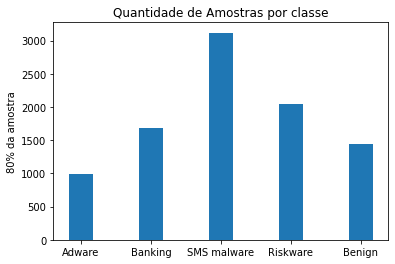

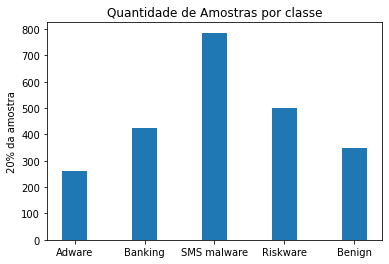

In [ ]:
y80DataFrame = y80.to_frame(name="Class")
y20DataFrame = y20.to_frame(name="Class")

classCount80 = y80DataFrame.groupby('Class')["Class"].count();
classCount20 = y20DataFrame.groupby('Class')["Class"].count();

labels = ['Adware', 'Banking', 'SMS malware', 'Riskware', 'Benign'];
men_means80 = classCount80;
men_means20 = classCount20;

width = 0.35;      
fig80, ax80 = plt.subplots();
ax80.set_title('Quantidade de Amostras por classe');
ax80.bar(labels, men_means80, width);
ax80.set_ylabel('80% da amostra');
plt.show();
print();
width = 0.35;      
fig20, ax20 = plt.subplots();
ax20.set_title('Quantidade de Amostras por classe');
ax20.bar(labels, men_means20, width);
ax20.set_ylabel('20% da amostra');
plt.show();

## Split Percentage e Normalização dos Dados

<p> Nesta etapa do programa, há uma nova divisão no bloco maior de dados, e novamente essa amostra é dividida em 80% usados para treino do algoritmo e 20% para testes, Nesse ponto temos dois conjuntos de dados que serão usados nos classificadores, os 20% dividos inicialmente e os adquiridos nessa nova separação.

<p> Também é feita a normalização dos dados usados em treino e teste, pois através de uma analise empirica, foi visto que o score dos classificadores era melhor após esse procedimento.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X80, y80, test_size=0.2, random_state=0);
sc = StandardScaler(with_mean=False);
sc.fit(X_train);
X_train = sc.transform(X_train);
X_test = sc.transform(X_test);

X20 = sc.transform(X20);


# Modelo K-Nearest Neighbors (KNN)

<p> Para o algoritmo do KNN foi utilizado 3 vizinhos e a weight function (função usada na predição do algoritmo) usada foi a distance.

## Teste com os 20% dos 80%

### Split Percentage

KNN padrão:

Porcentagem de Acerto: 0.8981681034482759
Erro absoluto: 0.21551724137931033
Confusion Matrix: 


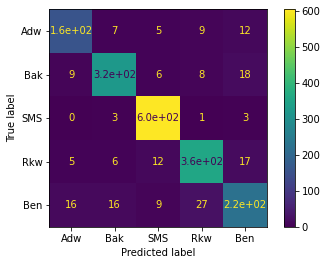

curva ROC


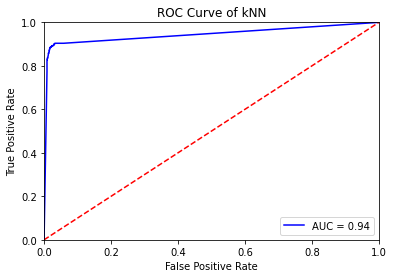

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3, weights='distance');
neigh.fit(X_train, y_train);
y_pred = neigh.predict(X_test);

print("KNN padrão:");
print();
print("Porcentagem de Acerto:", accuracy_score(y_test, y_pred));
print("Erro absoluto:", metrics.mean_absolute_error(y_test, y_pred));
print("Confusion Matrix: ");
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben'])
disp = disp.plot()
plt.show()
print("curva ROC")
y_scores = neigh.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:, 1], pos_label=2);

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

### Cross-Validation

Cross-Validation:

Conjunto: 1
Porcentagem de Acerto: 0.8883620689655173
Erro absoluto: 0.24482758620689654
Confusion Matrix: 


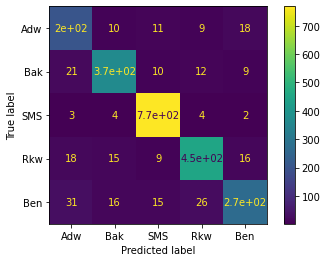


Conjunto: 2
Porcentagem de Acerto: 0.896551724137931
Erro absoluto: 0.2293103448275862
Confusion Matrix: 


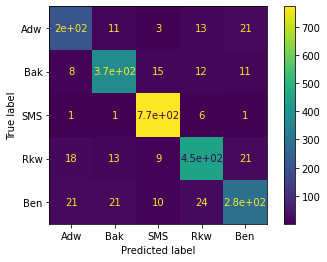


Conjunto: 3
Porcentagem de Acerto: 0.9004310344827586
Erro absoluto: 0.22586206896551725
Confusion Matrix: 


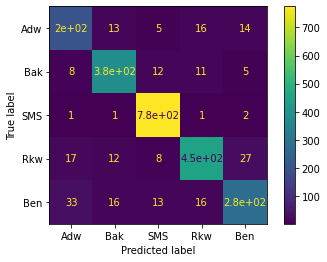


Conjunto: 4
Porcentagem de Acerto: 0.9072876239758516
Erro absoluto: 0.20396722725312635
Confusion Matrix: 


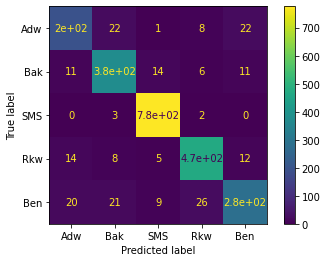


Conjunto: 5
Porcentagem de Acerto: 0.895644674428633
Erro absoluto: 0.22164726175075464
Confusion Matrix: 


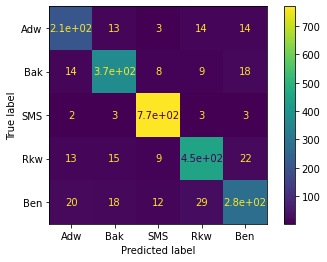

curva ROC


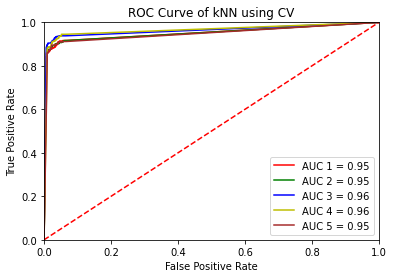

In [ ]:
print("Cross-Validation:");
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fpr = [];
tpr = [];
roc_auc = [];
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  print();
  print("Conjunto:", i + 1);
  X_train_cv, X_test_cv = X[train_index], X[test_index];
  y_train_cv, y_test_cv = y[train_index], y[test_index];
  sc.fit(X_train_cv);
  X_train_cv = sc.transform(X_train_cv);
  X_test_cv = sc.transform(X_test_cv);
  neigh.fit(X_train_cv, y_train_cv);
  cv_pred = neigh.predict(X_test_cv);
  cm = confusion_matrix(y_test_cv, cv_pred);
  disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben']);
  print("Porcentagem de Acerto:", accuracy_score(y_test_cv, cv_pred));
  print("Erro absoluto:", metrics.mean_absolute_error(y_test_cv, cv_pred));
  print("Confusion Matrix: ");
  disp_cv = disp_cv.plot()
  plt.show()
  y_scores = neigh.predict_proba(X_test_cv)
  fprAux, tprAux, thresholdsAux = metrics.roc_curve(y_test_cv, y_scores[:, 1], pos_label=2);
  fpr.append(fprAux);
  tpr.append(tprAux);
  roc_auc.append(auc(fpr[i], tpr[i]));

print("curva ROC")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr[0], tpr[0], 'r', label = 'AUC 1 = %0.2f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], 'g', label = 'AUC 2 = %0.2f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], 'b', label = 'AUC 3 = %0.2f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], 'y', label = 'AUC 4 = %0.2f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], 'brown', label = 'AUC 5 = %0.2f' % roc_auc[4])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN using CV')
plt.show()

## Teste com os 20% dos 100%

### Split Percentage

KNN padrão:

Porcentagem de Acerto: 0.9400862068965518
Erro absoluto: 0.11853448275862069
Confusion Matrix: 


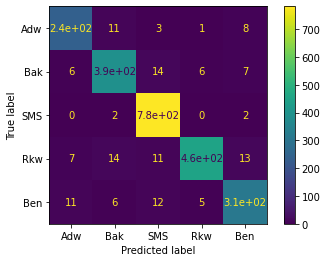

curva ROC


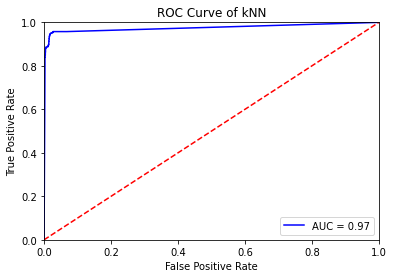

In [ ]:
y_pred = neigh.predict(X20);

print("KNN padrão:");
print();
print("Porcentagem de Acerto:", accuracy_score(y20, y_pred));
print("Erro absoluto:", metrics.mean_absolute_error(y20, y_pred));
print("Confusion Matrix: ");
cm = confusion_matrix(y20, y_pred);
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben'])
disp = disp.plot()
plt.show()
print("curva ROC")
y_scores = neigh.predict_proba(X20)
fpr, tpr, thresholds = metrics.roc_curve(y20, y_scores[:, 1], pos_label=2);

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

### Cross-Validation

Cross-Validation:

Conjunto: 1
Porcentagem de Acerto: 0.9198275862068965
Erro absoluto: 0.15905172413793103
Confusion Matrix: 


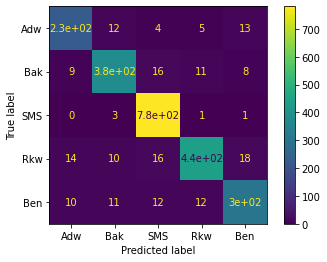


Conjunto: 2
Porcentagem de Acerto: 0.9487068965517241
Erro absoluto: 0.10086206896551723
Confusion Matrix: 


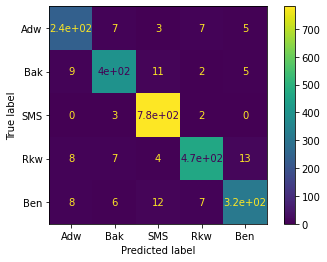


Conjunto: 3
Porcentagem de Acerto: 0.9413793103448276
Erro absoluto: 0.12413793103448276
Confusion Matrix: 


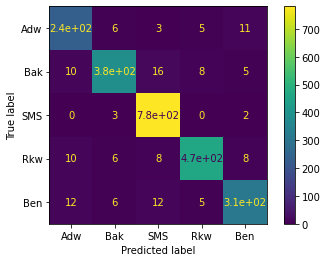


Conjunto: 4
Porcentagem de Acerto: 0.9504310344827587
Erro absoluto: 0.0978448275862069
Confusion Matrix: 


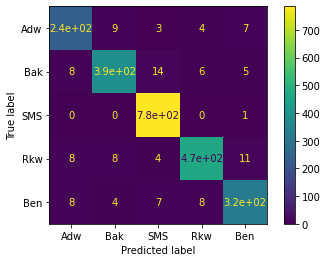


Conjunto: 5
Porcentagem de Acerto: 0.9400862068965518
Erro absoluto: 0.11853448275862069
Confusion Matrix: 


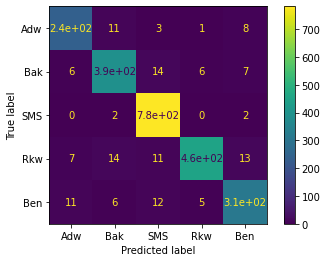

curva ROC


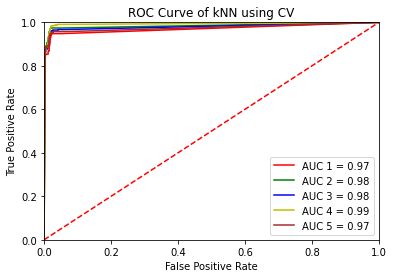

In [ ]:
print("Cross-Validation:");
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fpr = [];
tpr = [];
roc_auc = [];
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  print();
  print("Conjunto:", i + 1);
  X_train_cv, X_test_cv = X[train_index], X[test_index];
  y_train_cv, y_test_cv = y[train_index], y[test_index];
  sc.fit(X_train_cv);
  X_train_cv = sc.transform(X_train_cv);
  neigh.fit(X_train_cv, y_train_cv);
  cv_pred = neigh.predict(X20);
  cm = confusion_matrix(y20, cv_pred);
  disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben']);
  print("Porcentagem de Acerto:", accuracy_score(y20, cv_pred));
  print("Erro absoluto:", metrics.mean_absolute_error(y20, cv_pred));
  print("Confusion Matrix: ");
  disp_cv = disp_cv.plot()
  plt.show()
  y_scores = neigh.predict_proba(X20)
  fprAux, tprAux, thresholdsAux = metrics.roc_curve(y20, y_scores[:, 1], pos_label=2);
  fpr.append(fprAux);
  tpr.append(tprAux);
  roc_auc.append(auc(fpr[i], tpr[i]));

print("curva ROC")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr[0], tpr[0], 'r', label = 'AUC 1 = %0.2f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], 'g', label = 'AUC 2 = %0.2f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], 'b', label = 'AUC 3 = %0.2f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], 'y', label = 'AUC 4 = %0.2f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], 'brown', label = 'AUC 5 = %0.2f' % roc_auc[4])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN using CV')
plt.show()

# Modelo Random Forest

Para o modelo Random Forest foi utilizado 50 arvores, com o número mínimo de folhas e de divisões padrões, ou seja, 1 e 2 respectivamente, assim como o número máximo de folhas, nesse caso, não existe limite por padrão.

## Teste com os 20% dos 80%

### Split Percentage

Random Forest:
Porcentagem de Acerto: 0.9364224137931034
Erro absoluto: 0.13254310344827586
Confusion Matrix: 


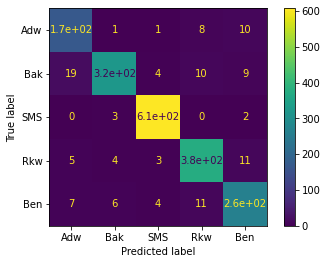

curva ROC


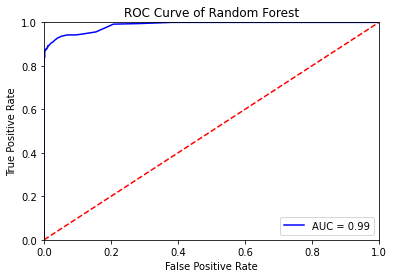

In [ ]:
RF = RandomForestClassifier(n_estimators=50, random_state=0, bootstrap=True, max_samples=7422);
RF.fit(X_train, y_train);
y_pred = RF.predict(X_test);

print("Random Forest:")
print("Porcentagem de Acerto:", accuracy_score(y_test, y_pred));
print("Erro absoluto:", metrics.mean_absolute_error(y_test, y_pred));
print("Confusion Matrix: ");
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben'])
disp = disp.plot()
plt.show()
print("curva ROC")
y_scores = RF.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:, 1], pos_label=2);
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()  

### Cross-Validation

Cross-Validation:

Entrada: 1
Porcentagem de Acerto: 0.9275862068965517
Erro absoluto: 0.17025862068965517
Confusion Matrix: 


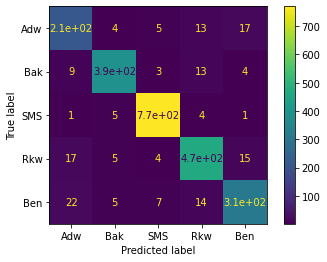


Entrada: 2
Porcentagem de Acerto: 0.9275862068965517
Erro absoluto: 0.1668103448275862
Confusion Matrix: 


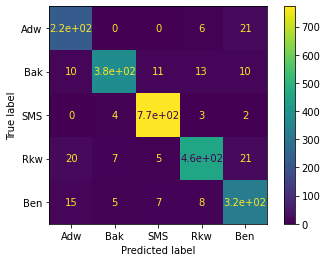


Entrada: 3
Porcentagem de Acerto: 0.9353448275862069
Erro absoluto: 0.13663793103448277
Confusion Matrix: 


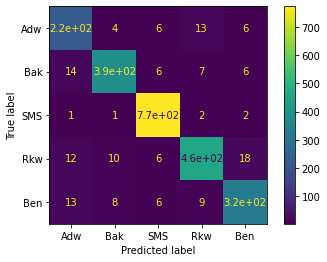


Entrada: 4
Porcentagem de Acerto: 0.9383354894351014
Erro absoluto: 0.14316515739542907
Confusion Matrix: 


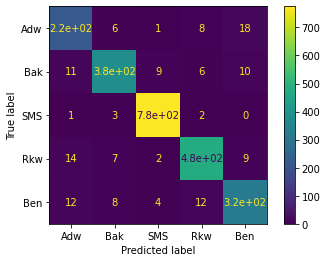


Entrada: 5
Porcentagem de Acerto: 0.9236739974126779
Erro absoluto: 0.17076326002587322
Confusion Matrix: 


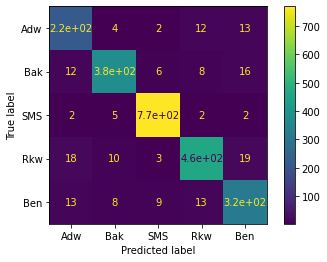

curva ROC


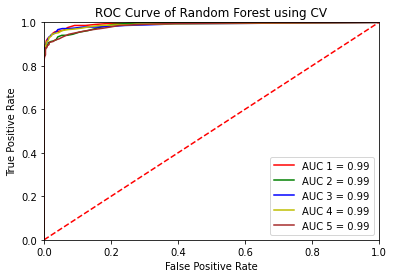

In [ ]:
print("Cross-Validation:");
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False);
fpr = []
tpr = []
roc_auc = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  print();
  print("Entrada:", i + 1);

  X_train_cv, X_test_cv = X[train_index], X[test_index];
  y_train_cv, y_test_cv = y[train_index], y[test_index];
  sc.fit(X_train_cv);
  X_train_cv = sc.transform(X_train_cv);
  X_test_cv = sc.transform(X_test_cv);
  RF.fit(X_train_cv, y_train_cv);
  cv_pred = RF.predict(X_test_cv);
  cm = confusion_matrix(y_test_cv, cv_pred);
  disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben']);
  print("Porcentagem de Acerto:", accuracy_score(y_test_cv, cv_pred));
  print("Erro absoluto:", metrics.mean_absolute_error(y_test_cv, cv_pred));
  print("Confusion Matrix: ");
  disp_cv = disp_cv.plot();
  plt.show();
  #ROC Curve
  y_scores = RF.predict_proba(X_test_cv);
  fprAux, tprAux, thresholdsAux = metrics.roc_curve(y_test_cv, y_scores[:, 1], pos_label=2);
  fpr.append(fprAux);
  tpr.append(tprAux);
  roc_auc.append(auc(fpr[i], tpr[i]));
 

print("curva ROC")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr[0], tpr[0], 'r', label = 'AUC 1 = %0.2f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], 'g', label = 'AUC 2 = %0.2f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], 'b', label = 'AUC 3 = %0.2f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], 'y', label = 'AUC 4 = %0.2f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], 'brown', label = 'AUC 5 = %0.2f' % roc_auc[4])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest using CV')
plt.show()  

## Teste com os 20% dos 100%

### Split Percentage

Random Forest:
Porcentagem de Acerto: 0.9642241379310345
Erro absoluto: 0.07155172413793104
Confusion Matrix: 


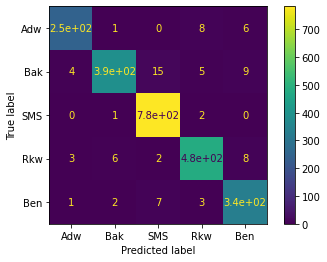

curva ROC


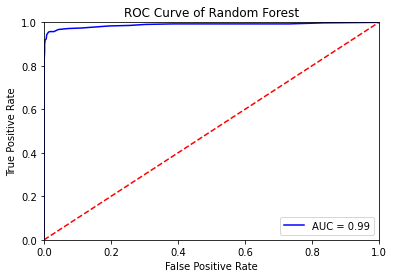

In [ ]:
y_pred = RF.predict(X20);
print("Random Forest:")
print("Porcentagem de Acerto:", accuracy_score(y20, y_pred));
print("Erro absoluto:", metrics.mean_absolute_error(y20, y_pred));
print("Confusion Matrix: ");
cm = confusion_matrix(y20, y_pred);
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben'])
disp = disp.plot()
plt.show()
print("curva ROC")
y_scores = RF.predict_proba(X20)
fpr, tpr, thresholds = metrics.roc_curve(y20, y_scores[:, 1], pos_label=2);
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show() 

### Cross-Validation


Cross-Validation:

Conjunto: 1
Porcentagem de Acerto: 0.9474137931034483
Erro absoluto: 0.10560344827586207
Confusion Matrix: 


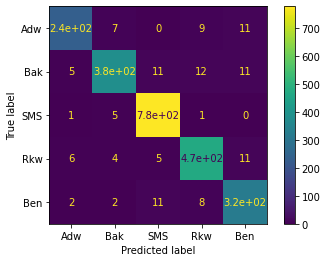


Conjunto: 2
Porcentagem de Acerto: 0.9689655172413794
Erro absoluto: 0.06551724137931035
Confusion Matrix: 


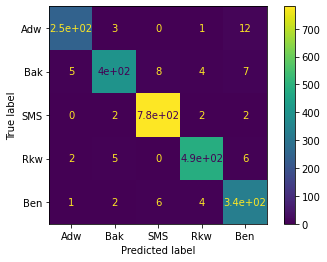


Conjunto: 3
Porcentagem de Acerto: 0.959051724137931
Erro absoluto: 0.0771551724137931
Confusion Matrix: 


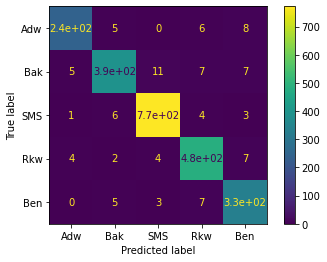


Conjunto: 4
Porcentagem de Acerto: 0.9577586206896552
Erro absoluto: 0.09008620689655172
Confusion Matrix: 


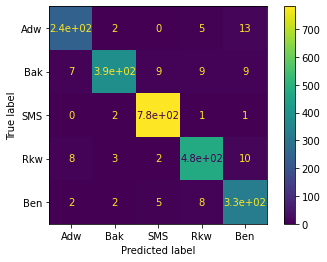


Conjunto: 5
Porcentagem de Acerto: 0.9642241379310345
Erro absoluto: 0.07155172413793104
Confusion Matrix: 


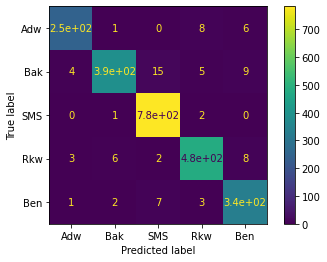

curva ROC


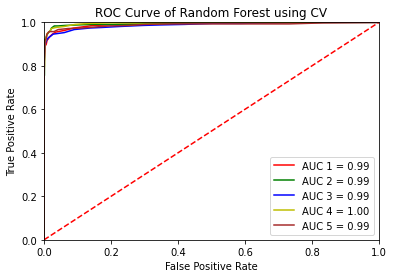

In [ ]:
print("Cross-Validation:");
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fpr = [];
tpr = [];
roc_auc = [];
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  print();
  print("Conjunto:", i + 1);
  X_train_cv, X_test_cv = X[train_index], X[test_index];
  y_train_cv, y_test_cv = y[train_index], y[test_index];
  sc.fit(X_train_cv);
  X_train_cv = sc.transform(X_train_cv);
  RF.fit(X_train_cv, y_train_cv);
  cv_pred = RF.predict(X20);
  cm = confusion_matrix(y20, cv_pred);
  disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben']);
  print("Porcentagem de Acerto:", accuracy_score(y20, cv_pred));
  print("Erro absoluto:", metrics.mean_absolute_error(y20, cv_pred));
  print("Confusion Matrix: ");
  disp_cv = disp_cv.plot()
  plt.show()
  y_scores = RF.predict_proba(X20)
  fprAux, tprAux, thresholdsAux = metrics.roc_curve(y20, y_scores[:, 1], pos_label=2);
  fpr.append(fprAux);
  tpr.append(tprAux);
  roc_auc.append(auc(fpr[i], tpr[i]));

print("curva ROC")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr[0], tpr[0], 'r', label = 'AUC 1 = %0.2f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], 'g', label = 'AUC 2 = %0.2f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], 'b', label = 'AUC 3 = %0.2f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], 'y', label = 'AUC 4 = %0.2f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], 'brown', label = 'AUC 5 = %0.2f' % roc_auc[4])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest using CV')
plt.show()

# Modelo Neural Network

Para o modelo Neural Network foram utilizadas as seguintes configurações dos parâmetros:
- Função de ativação: relu para a hidden layer.
- 1 hidden layer com 138 neurônios e uma de saida com 138 neurônis.
- Adam como solver para otimização,
- 1500 como máximo de iterações,
- alpha de 0.01

## Teste com os 20% dos 80%

### Split Percentage

Neural Network:
Porcentagem de Acerto: 0.8841594827586207
Erro absoluto: 0.21767241379310345
Confusion Matrix: 


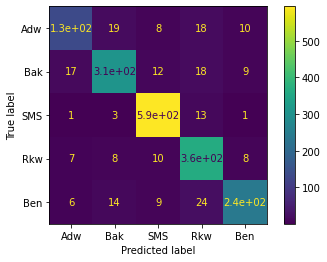

ROC Curve


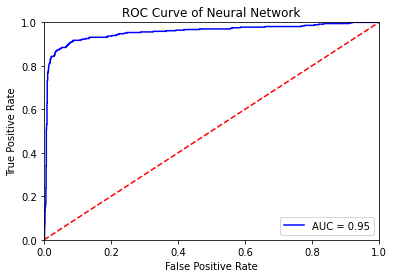

In [ ]:
NN = MLPClassifier(solver='adam', alpha=1e-2, hidden_layer_sizes=(138,), max_iter=1500);
NN.fit(X_train, y_train)
y_pred = NN.predict(X_test);

print("Neural Network:")
print("Porcentagem de Acerto:", accuracy_score(y_test, y_pred));
print("Erro absoluto:", metrics.mean_absolute_error(y_test, y_pred));
print("Confusion Matrix: ");
cm = confusion_matrix(y_test, y_pred);
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben']);
disp = disp.plot();
plt.show();
#ROC CURVE 
print("ROC Curve");
y_scores = NN.predict_proba(X_test);
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores[:, 1], pos_label=2);
roc_auc = auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');
plt.title('ROC Curve of Neural Network');
plt.show();

### Cross-Validation

Cross-Validation:
Conjunto 1
Porcentagem de Acerto: 0.8918103448275863
Erro absoluto: 0.2038793103448276
Confusion Matrix: 


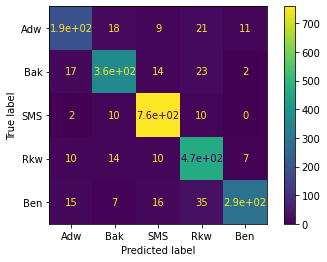

Conjunto 2
Porcentagem de Acerto: 0.9021551724137931
Erro absoluto: 0.19008620689655173
Confusion Matrix: 


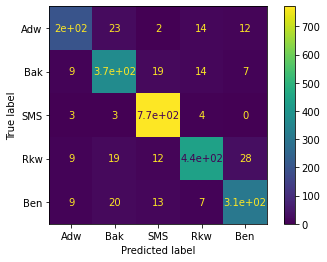

Conjunto 3
Porcentagem de Acerto: 0.8931034482758621
Erro absoluto: 0.20474137931034483
Confusion Matrix: 


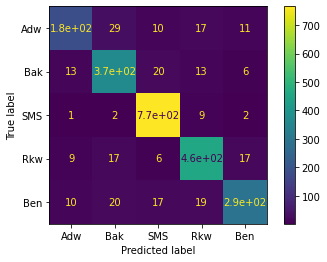

Conjunto 4
Porcentagem de Acerto: 0.8939197930142303
Erro absoluto: 0.20310478654592498
Confusion Matrix: 


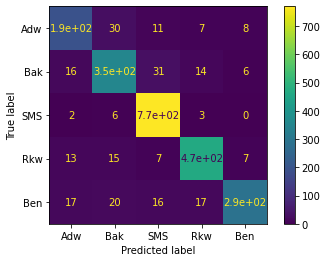

Conjunto 5
Porcentagem de Acerto: 0.8891763691246227
Erro absoluto: 0.21647261750754634
Confusion Matrix: 


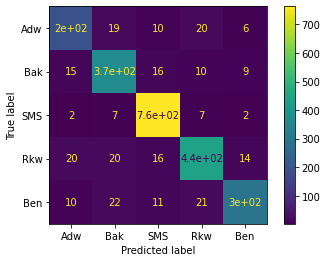

ROC Curve


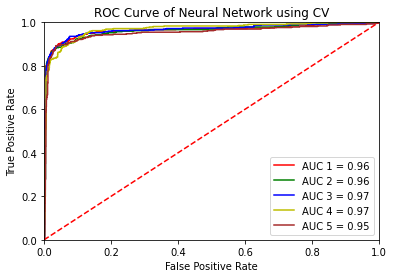

In [ ]:
print("Cross-Validation:");

fpr = []
tpr = []
roc_auc = []

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  X_train_cv, X_test_cv = X[train_index], X[test_index]
  y_train_cv, y_test_cv = y[train_index], y[test_index]
  sc.fit(X_train_cv);
  X_train_cv = sc.transform(X_train_cv);
  X_test_cv = sc.transform(X_test_cv)
  NN.fit(X_train_cv, y_train_cv);
  cv_pred = NN.predict(X_test_cv);
  cm = confusion_matrix(y_test_cv, cv_pred);
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben']);
  print("Conjunto", i + 1);
  print("Porcentagem de Acerto:", accuracy_score(y_test_cv, cv_pred));
  print("Erro absoluto:", metrics.mean_absolute_error(y_test_cv, cv_pred));
  print("Confusion Matrix: ");  
  disp = disp.plot();
  plt.show();

  # ROC Curve computation
  y_scores = NN.predict_proba(X_test_cv);
  fprAux, tprAux, thresholds = metrics.roc_curve(y_test_cv, y_scores[:, 1], pos_label=2);
  fpr.append(fprAux);
  tpr.append(tprAux);
  roc_auc.append(auc(fpr[i], tpr[i]));


print("ROC Curve");
plt.title('Receiver Operating Characteristic');
plt.plot(fpr[0], tpr[0], 'r', label = 'AUC 1 = %0.2f' % roc_auc[0]);
plt.plot(fpr[1], tpr[1], 'g', label = 'AUC 2 = %0.2f' % roc_auc[1]);
plt.plot(fpr[2], tpr[2], 'b', label = 'AUC 3 = %0.2f' % roc_auc[2]);
plt.plot(fpr[3], tpr[3], 'y', label = 'AUC 4 = %0.2f' % roc_auc[3]);
plt.plot(fpr[4], tpr[4], 'brown', label = 'AUC 5 = %0.2f' % roc_auc[4]);

plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');
plt.title('ROC Curve of Neural Network using CV')
plt.show() 

## Teste com os 20% dos 100%

### Split Percentage

Neural Network:
Porcentagem de Acerto: 0.9211206896551725
Erro absoluto: 0.14094827586206896
Confusion Matrix: 


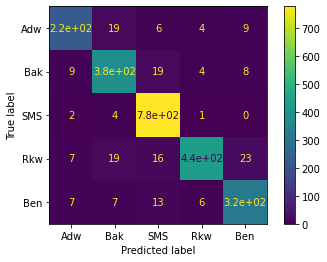

ROC Curve


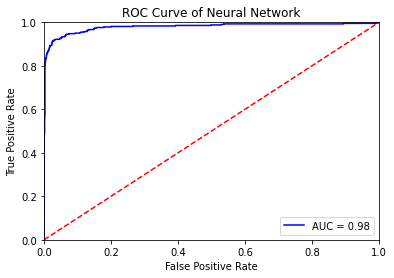

In [ ]:
y_pred = NN.predict(X20);

print("Neural Network:")
print("Porcentagem de Acerto:", accuracy_score(y20, y_pred));
print("Erro absoluto:", metrics.mean_absolute_error(y20, y_pred));
print("Confusion Matrix: ");
cm = confusion_matrix(y20, y_pred);
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben']);
disp = disp.plot();
plt.show();

#ROC CURVE 
print("ROC Curve");
y_scores = NN.predict_proba(X20);
fpr, tpr, thresholds = metrics.roc_curve(y20, y_scores[:, 1], pos_label=2);
roc_auc = auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');
plt.title('ROC Curve of Neural Network');
plt.show();

### Cross-Validation

Cross-Validation:

Conjunto: 1
Porcentagem de Acerto: 0.8077586206896552
Erro absoluto: 0.3228448275862069
Confusion Matrix: 


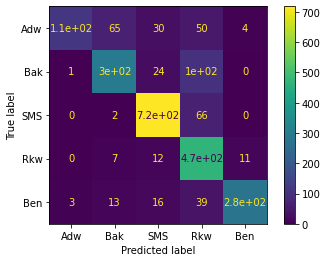


Conjunto: 2
Porcentagem de Acerto: 0.9125
Erro absoluto: 0.19267241379310346
Confusion Matrix: 


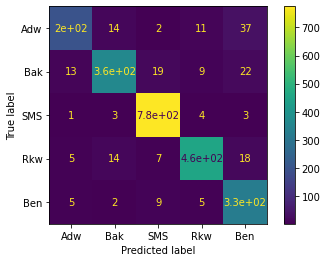


Conjunto: 3
Porcentagem de Acerto: 0.8870689655172413
Erro absoluto: 0.2206896551724138
Confusion Matrix: 


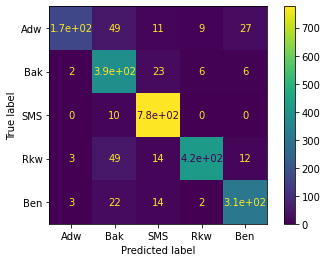


Conjunto: 4
Porcentagem de Acerto: 0.9168103448275862
Erro absoluto: 0.1724137931034483
Confusion Matrix: 


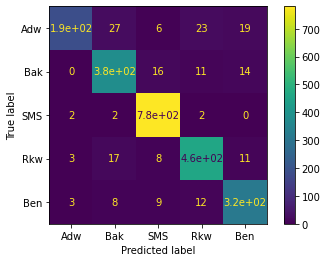


Conjunto: 5
Porcentagem de Acerto: 0.9193965517241379
Erro absoluto: 0.15301724137931033
Confusion Matrix: 


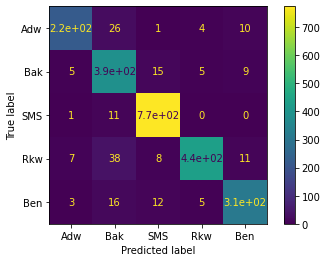

curva ROC


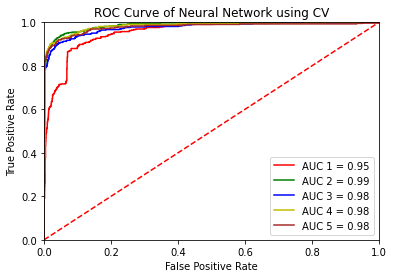

In [ ]:
print("Cross-Validation:");
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
fpr = [];
tpr = [];
roc_auc = [];
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  print();
  print("Conjunto:", i + 1);
  X_train_cv, X_test_cv = X[train_index], X[test_index];
  y_train_cv, y_test_cv = y[train_index], y[test_index];
  sc.fit(X_train_cv);
  X_train_cv = sc.transform(X_train_cv);
  NN.fit(X_train_cv, y_train_cv);
  cv_pred = NN.predict(X20);
  cm = confusion_matrix(y20, cv_pred);
  disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Adw', 'Bak', 'SMS', 'Rkw', 'Ben']);
  print("Porcentagem de Acerto:", accuracy_score(y20, cv_pred));
  print("Erro absoluto:", metrics.mean_absolute_error(y20, cv_pred));
  print("Confusion Matrix: ");
  disp_cv = disp_cv.plot()
  plt.show()
  y_scores = NN.predict_proba(X20)
  fprAux, tprAux, thresholdsAux = metrics.roc_curve(y20, y_scores[:, 1], pos_label=2);
  fpr.append(fprAux);
  tpr.append(tprAux);
  roc_auc.append(auc(fpr[i], tpr[i]));

print("curva ROC")

plt.title('Receiver Operating Characteristic')
plt.plot(fpr[0], tpr[0], 'r', label = 'AUC 1 = %0.2f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], 'g', label = 'AUC 2 = %0.2f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], 'b', label = 'AUC 3 = %0.2f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], 'y', label = 'AUC 4 = %0.2f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], 'brown', label = 'AUC 5 = %0.2f' % roc_auc[4])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Neural Network using CV')
plt.show()

# Considerações Finais

<p> A classificação usando os modelos já apresentados anteriormente, apresentam resultados satisfatórios para todos os testes, um dos motivos para isso acontecer se deve pela distribuição relativamente igualitária dos dados visto na seção 1.2 e a quantidade de características apresentadas por cada um deles, outra causa que justifica os resultados alcançados, é que cada algoritmo contém algumas particularidades na escolha das suas configurações de inicialização, testados de forma empírica para obter um tratamento mais singular para cada dataset produzido e consequentemente um resultado com maior precisão.

<p> No KNN foi usado 3 vizinhos para fazer a classificação, foram testados vizinhos maiores e os rendimentos foram inferiores, a weight function utilizada foi a "distance", de forma análoga a escolha dos vizinhos foram feitos testes empíricos para analisar a função que apresentaria o maior desempenho para o dataset, o algoritmo usado para computar os vizinhos mais próximos foi o "auto", pois segundo a própria documentação do sklearn é o que apresenta o melhor desempenho para dados que passaram pelo método fit.

<p> Para o Random Forest foi escolhido um número de 50 arvores para compor a floresta, teoricamente, há uma relação diretamente proporcional entre o número de arvores e o desempenho do algoritmo, porém não foi escolhido um número maior por conta do tempo de execução do programa em relação ao resultado gerado, isto é, não há uma melhora significativa que justifique o aumento na duração do algoritmo, outro aspecto do programa é que não foi utilizado um número máximo para as folhas, porque limitava o seu desempenho, assim como algumas outras características mantidas como padrão.

<p> Analisando modelo Neural Network. Chegamos a conclusão que tais resultados satisfatórios puderam ser obtidos pelas seguintes adequações dos hiper parâmetros: A escolha de um valor relativamente baixo do alpha para que compense o grande número de features utilizados nesse dataset, porém sem causar um overfitting no modelo. Também pela escolha do "solver" adam para otimização de pesos que trabalham melhor para datasets maiores. Por último, chegamos empiricamente a conclusão que grandes números de hidden layers não traziam melhoras significativas nos resultados comparados ao uso de apenas uma. Porém, o número de neurônios da hidden layer tem que ser próximo ao numero de features.